In [1]:
from keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR = "./Training_faces"
VALIDATION_DIR = "./Validation_faces"

train_datagen = ImageDataGenerator(rescale=1./255,                                      
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [2]:
import os
print(os.listdir(TRAINING_DIR))
print(os.listdir(VALIDATION_DIR))

['female', 'male']
['female', 'male']


In [3]:
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,target_size=(100,100),class_mode='categorical',color_mode='grayscale')

Found 47009 images belonging to 2 classes.


In [4]:
test_generator = test_datagen.flow_from_directory(VALIDATION_DIR, target_size=(100,100), class_mode='categorical',color_mode='grayscale')

Found 11649 images belonging to 2 classes.


In [5]:
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras import Sequential


In [6]:
model1 = Sequential()

model1.add(keras.Input(shape=(100, 100, 1)))

model1.add(layers.Conv2D(filters=64, kernel_size=(2,2), activation="relu"))
model1.add(layers.Dropout(0.2))
model1.add(layers.MaxPooling2D(pool_size=(2,2)))
model1.add(layers.Conv2D(filters=64, kernel_size=(2,2), activation="relu"))
model1.add(layers.Dropout(0.2))
model1.add(layers.MaxPooling2D(pool_size=(2,2)))
model1.add(layers.Dropout(0.2))
model1.add(layers.Conv2D(filters=128, kernel_size=(2,2), activation="relu"))

model1.add(layers.Flatten())

num_classes = 2
model1.add(layers.Dropout(0.2))
model1.add(layers.Dense(512,activation="relu"))
model1.add(layers.Dropout(0.2))
model1.add(layers.Dense(num_classes, activation="softmax"))
                                                                                                                                                                                                                                                                                                                                                                                                   
model1.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [7]:
model1.fit(train_generator,validation_data=test_generator,epochs=12)

Epoch 1/12
1470/1470 [==============================] - 367s 244ms/step - loss: 0.6339 - accuracy: 0.6441 - val_loss: 0.5177 - val_accuracy: 0.7593
Epoch 2/12
1470/1470 [==============================] - 84s 57ms/step - loss: 0.5357 - accuracy: 0.7352 - val_loss: 0.3813 - val_accuracy: 0.8425
Epoch 3/12
1470/1470 [==============================] - 83s 57ms/step - loss: 0.4281 - accuracy: 0.8045 - val_loss: 0.2981 - val_accuracy: 0.8850
Epoch 4/12
1470/1470 [==============================] - 83s 57ms/step - loss: 0.3581 - accuracy: 0.8441 - val_loss: 0.2368 - val_accuracy: 0.9115
Epoch 5/12
1470/1470 [==============================] - 83s 57ms/step - loss: 0.3209 - accuracy: 0.8644 - val_loss: 0.2171 - val_accuracy: 0.9143
Epoch 6/12
1470/1470 [==============================] - 83s 56ms/step - loss: 0.3058 - accuracy: 0.8734 - val_loss: 0.2236 - val_accuracy: 0.9182
Epoch 7/12
1470/1470 [==============================] - 84s 57ms/step - loss: 0.2853 - accuracy: 0.8817 - val_loss: 0.1997

In [8]:
model1.save('grayscale_gender.h5')

Your Prediction: 
This is a Female:))!


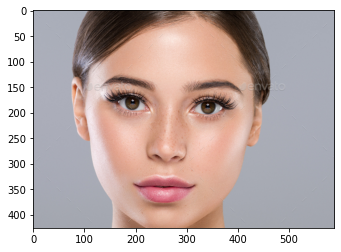

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('./jju-32.jpg')
imgg = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = img / 255
img = cv2.resize(img,(100,100))
img = np.reshape(img,[1,100,100,1])
predict_emirhan_eye = model1.predict(img)
print("""Your Prediction: """)
if predict_emirhan_eye[0][1] > predict_emirhan_eye[0][0] :
  print("this is a Male, man!")
elif predict_emirhan_eye[0][0] > predict_emirhan_eye[0][1] :
    print("This is a Female:))!")
plt.imshow(imgg)
plt.show()

In [16]:
import cv2
import numpy as np

img = cv2.imread('./jju-32.jpg')
imgg = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = img / 255
img = cv2.resize(img,(100,100))
img = np.reshape(img,[1,100,100,1])
model1.predict(img)

array([[0.68306226, 0.3169378 ]], dtype=float32)

In [24]:
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import os
import cvlib as cv
                    
# load model
model = load_model('./grayscale_gender.h5')

# open webcam
webcam = cv2.VideoCapture(0)
    
classes = ['woman','man']

# loop through frames
while webcam.isOpened():

    # read frame from webcam 
    status, frame = webcam.read()

    # apply face detection
    face, confidence = cv.detect_face(frame)


    # loop through detected faces
    for idx, f in enumerate(face):

        # get corner points of face rectangle        
        (startX, startY) = f[0], f[1]
        (endX, endY) = f[2], f[3]

        # draw rectangle over face
        cv2.rectangle(frame, (startX,startY), (endX,endY), (0,255,0), 2)

        # crop the detected face region
        face_crop = np.copy(frame[startY:endY,startX:endX])

        if (face_crop.shape[0]) < 10 or (face_crop.shape[1]) < 10:
            continue

        # preprocessing for gender detection model
        face_crop = cv2.cvtColor(face_crop,cv2.COLOR_BGR2GRAY)
        face_crop = face_crop.astype("float") / 255.0
        face_crop = cv2.resize(face_crop,(100,100))
        face_crop = np.reshape(face_crop,[1,100,100,1])

        # apply gender detection on face
        conf = model.predict(face_crop)[0] # model.predict return a 2D matrix, ex: [[9.9993384e-01 7.4850512e-05]]

        # get label with max accuracy
        idx = np.argmax(conf)
        label = classes[idx]

        label = "{}: {:.2f}%".format(label, conf[idx] * 100)

        Y = startY - 10 if startY - 10 > 10 else startY + 10

        # write label and confidence above face rectangle
        cv2.putText(frame, label, (startX, Y),  cv2.FONT_HERSHEY_SIMPLEX,
                    0.7, (0, 255, 0), 2)

    # display output
    cv2.imshow("gender detection", frame)

    # press "Q" to stop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# release resources
webcam.release()
cv2.destroyAllWindows()